# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [3]:
raw_train=pd.read_csv('Bank_data.csv')
raw_train

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,516,0.877,0.0,0.0,5.0,1.0,473.0,yes


In [9]:
x_train=raw_train
new_train=x_train.drop('Unnamed: 0',axis=1)
new_train['y']=new_train['y'].map({'yes':1,'no':0})
new_train

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,5.0,1.0,473.0,1


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [10]:
x=new_train['duration']
y=new_train['y']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [11]:
x1=sm.add_constant(x)
bank=sm.Logit(y,x1)
bank_train=bank.fit()
bank_train.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Sat, 25 Sep 2021   Pseudo R-squ.:                  0.2121
Time:                        16:00:56   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

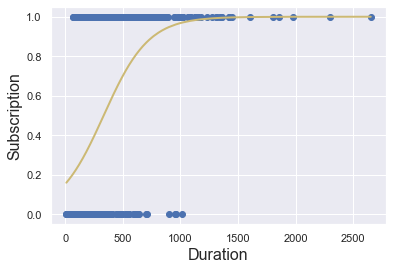

In [13]:
def f(x1,b0,b1):
    return np.array(np.exp(b0+x1*b1))/(1+np.exp(b0+x1*b1))

#Sorting y and x values
f_sorted= np.sort(f(x,bank_train.params[0],bank_train.params[1]))
x_sorted= np.sort(np.array(x))

plt.scatter(x,y,color='C0')
plt.xlabel('Duration',fontsize=16)
plt.ylabel('Subscription',fontsize=16)
plt.plot(x_sorted,f_sorted,lw=2,color='C8')
plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [15]:
x=new_train[['duration','interest_rate','march','credit','previous']]
y=new_train['y']

In [16]:
x1=sm.add_constant(x)
bank=sm.Logit(y,x1)
bank_train=bank.fit()
bank_train.summary()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Sat, 25 Sep 2021   Pseudo R-squ.:                  0.5143
Time:                        16:05:29   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
duration          0.0070      0.001      9.381      0.000       0.006       0.008
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
credit            2.3585      1.088      2.169      0.030       0.227       4.490
previous          1.5363      0.501      3.067      0.002       0.554       2.518
=================================================================================
"""

### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [17]:
def confusion_matrix(new_train,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(new_train)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [22]:
confusion_matrix(x1,y,bank_train)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [18]:
raw_test=pd.read_csv('Bank_data_testing.csv')
raw_test

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no
...,...,...,...,...,...,...,...,...
217,217,4.963,0.0,0.0,0.0,0.0,458.0,yes
218,218,1.264,0.0,1.0,1.0,0.0,397.0,yes
219,219,1.281,0.0,1.0,0.0,0.0,34.0,no
220,220,0.739,0.0,0.0,2.0,0.0,233.0,no


In [20]:
new_test=raw_test
true_test=new_test.drop('Unnamed: 0',axis=1)
true_test['y']=true_test['y'].map({'yes':1,'no':0})
true_test

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0
...,...,...,...,...,...,...,...
217,4.963,0.0,0.0,0.0,0.0,458.0,1
218,1.264,0.0,1.0,1.0,0.0,397.0,1
219,1.281,0.0,1.0,0.0,0.0,34.0,0
220,0.739,0.0,0.0,2.0,0.0,233.0,0


### Declare the dependent and the independent variables

In [29]:
x_test=true_test[['duration','interest_rate','march','credit','previous']]
y_test=true_test['y']
x2_test=sm.add_constant(x_test)

In [31]:
print(x2_test.shape)
print(y_test.shape)

(222, 6)
(222,)


In [26]:
print(x1.shape)
print(y.shape)

(518, 6)
(518,)


In [33]:
confusion_matrix(x2_test,y_test,bank_train)

(array([[93., 18.],
        [13., 98.]]),
 0.8603603603603603)

In [24]:
confusion_matrix(x1,y,bank_train)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)